# Random Forest Prediction

In [19]:
import os
os.chdir('C:\Users\Lundi\Documents\Programming\Python\Kaggle\Titanic - 2015')
import TitanicPreprocessor as tp
import sklearn.ensemble as skl_ensemble
from sklearn.grid_search import GridSearchCV
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, y = tp.getData()

## Random Forest Optimization

In [25]:
rf_clf = skl_ensemble.RandomForestClassifier()

rf_clf_gs_params = [
    {'n_estimators': [10,100,1000], 
     'criterion': ['gini'], 
     'max_depth': [None, 1,2,3,4],  
     'min_samples_leaf': [1,2,3,4],
     'max_features': ['auto',1,2,3,4]
    },
    {'n_estimators': [10,100,1000], 
     'criterion': ['entropy'], 
     'max_depth': [None, 1,2,3,4],  
     'min_samples_leaf': [1,2,3,4],
     'max_features': ['auto',1,2,3,4]
    }
]
rf_gs_clf = GridSearchCV(rf_clf, param_grid = rf_clf_gs_params, cv=10)
rf_gs_clf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 100, 1000], 'max_features': ['auto', 1, 2, 3, 4], 'criterion': ['gini'], 'max_depth': [None, 1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]}, {'n_estimators': [10, 100, 1000], 'max_features': ['auto', 1, 2, 3, 4], 'criterion': ['entropy'], 'max_depth': [None, 1, 2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
rf_gs_result_list = []

for params, mean_score, scores in rf_gs_clf.grid_scores_:
    print('%0.3f+/-%0.3f %r' % (mean_score, np.std(scores), params))
    rf_gs_result_list.append([mean_score, params['max_features'], params['n_estimators'], params['criterion'], params['max_depth'], params['min_samples_leaf']])

0.801+/-0.044 {'max_features': 'auto', 'n_estimators': 10, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.805+/-0.037 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.804+/-0.041 {'max_features': 'auto', 'n_estimators': 1000, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.816+/-0.046 {'max_features': 'auto', 'n_estimators': 10, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
0.823+/-0.045 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
0.828+/-0.047 {'max_features': 'auto', 'n_estimators': 1000, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
0.824+/-0.046 {'max_features': 'auto', 'n_estimators': 10, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
0.826+/-0.049 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3}
0.825+/-0.048 {'m

In [27]:
rf_gs_result_df = pd.DataFrame(rf_gs_result_list, columns=['mean_score','max_features','n_estimators',  'criterion', 'max_depth', 'min_samples_leaf'])
rf_gs_result_df.head()

,mean_score,max_features,n_estimators,criterion,max_depth,min_samples_leaf
0,0.801347,auto,10,gini,NaN,1
1,0.804714,auto,100,gini,NaN,1
2,0.803591,auto,1000,gini,NaN,1
3,0.815937,auto,10,gini,NaN,2
4,0.822671,auto,100,gini,NaN,2


#### Seeing what factors make a difference

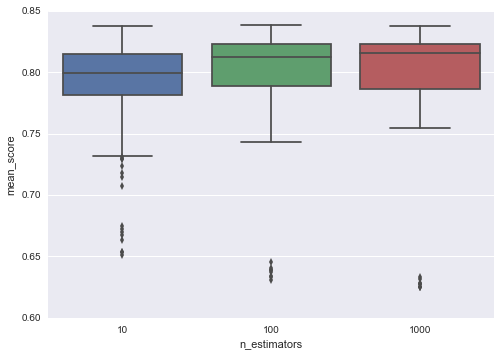

In [29]:
sns.boxplot(x = 'n_estimators', y = 'mean_score', data=rf_gs_result_df)

##### More estimators do help

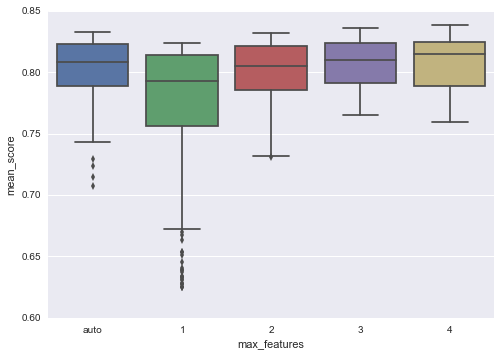

In [30]:
sns.boxplot(x = 'max_features', y = 'mean_score', data=rf_gs_result_df)

##### Max_features = 'auto' works well

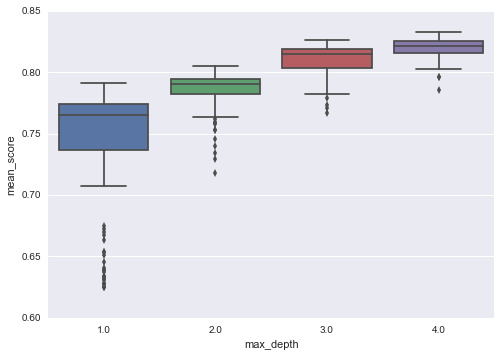

In [31]:
sns.boxplot(x = 'max_depth', y = 'mean_score', data=rf_gs_result_df)

##### Higher max-depth helps a good amount.

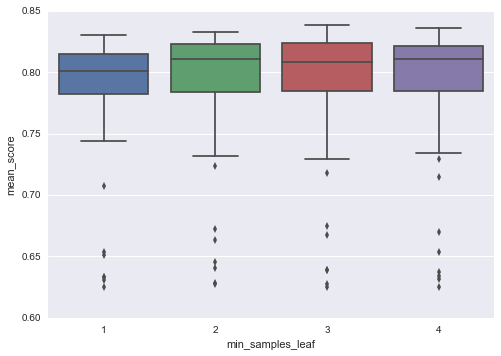

In [32]:
sns.boxplot(x = 'min_samples_leaf', y = 'mean_score', data=rf_gs_result_df)

### Further optimization

In [33]:
rf_clf = skl_ensemble.RandomForestClassifier()

rf_clf_gs_params_2 = [
    {'n_estimators': [100], 
     'criterion': ['entropy'], 
     'max_depth': [4,5,6,7,8],  
     'min_samples_leaf': [2],
     'max_features': ['auto']
    }
]
rf_gs_clf_2 = GridSearchCV(rf_clf, param_grid = rf_clf_gs_params_2, cv=10)
rf_gs_clf_2.fit(X, y)

rf_gs_result_2_list = []

for params, mean_score, scores in rf_gs_clf_2.grid_scores_:
    print('%0.3f+/-%0.3f %r' % (mean_score, np.std(scores), params))
    rf_gs_result_2_list.append([mean_score, params['max_features'], params['n_estimators'], params['criterion'], params['max_depth'], params['min_samples_leaf']])

0.824+/-0.037 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}
0.824+/-0.042 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}
0.822+/-0.041 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2}
0.824+/-0.049 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2}
0.820+/-0.054 {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}


The max depth caps out around 4-5, so let's go with that.